In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
print(sys.version)

3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]


In [78]:
from imblearn.over_sampling import SMOTE

def smoteOverSamling(train,nn,r):
    sm = SMOTE(random_state=42, k_neighbors = nn, ratio = r)
    return sm.fit_sample(train.drop('fraud',axis=1), train['fraud'])


In [79]:

def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer




from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

def normalization(train):
    feature_scaler = StandardScaler()
    X_scaled = pd.DataFrame(feature_scaler.fit_transform(train.values), columns=train.columns, index=train.index)
    return X_scaled


In [81]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



train_pure=pd.read_csv('train.csv',sep=',',index_col=0)
x_pure= train_pure.drop('fraud',axis=1)
y_pure= train_pure['fraud']

x_train, x_holdout, y_train, y_holdout = train_test_split(x_pure, y_pure, test_size=0.2, random_state=324)

train=x_train
train['fraud']= y_train


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [7]:
import GAN_171103

# For reloading after making changes
import importlib
importlib.reload(GAN_171103) 
from GAN_171103 import *

In [8]:
rand_dim = x.shape[1] # 32 # needs to be ~data_dim
base_n_count = 128 # 128

nb_steps = 500 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = 'cache/'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

# show = False
show = True 

# train = create_toy_spiral_df(1000)
# train = create_toy_df(n=1000,n_dim=2,n_classes=4,seed=0)
train = train_pure.copy().reset_index(drop=True) # fraud only with labels from classification

# train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
label_cols = [ i for i in train.columns if 'fraud' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train[ data_cols ] = train[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train[ data_cols ]
train_no_label

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,scannedLineItems,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
0,0.5,105.4,5.470,0.7,0.0,0.3,0.002751,0.005190,0.024138,2.9,0.188621,0.000000,0.010345,0.000664,0.000000,0.000285,1.926874,0.012797,0.000000,0.005484
1,0.3,10.8,2.736,0.5,0.2,0.4,0.012963,0.025333,0.035714,1.4,0.195429,0.014286,0.028571,0.004630,0.001852,0.003704,0.394737,0.018275,0.007310,0.014620
2,0.3,151.6,6.216,0.3,1.0,0.5,0.000858,0.004100,0.023077,1.3,0.478154,0.076923,0.038462,0.000198,0.000660,0.000330,2.438867,0.004826,0.016088,0.008044
3,0.6,179.1,9.231,0.8,0.4,0.4,0.001619,0.005154,0.027586,2.9,0.318310,0.013793,0.013793,0.000447,0.000223,0.000223,1.940201,0.008666,0.004333,0.004333
4,0.5,43.0,8.153,0.3,0.7,0.2,0.006279,0.018960,0.011111,2.7,0.301963,0.025926,0.007407,0.000698,0.001628,0.000465,0.527413,0.003680,0.008586,0.002453
5,0.1,77.0,1.109,1.1,0.5,0.2,0.003377,0.001440,0.042308,2.6,0.042654,0.019231,0.007692,0.001429,0.000649,0.000260,6.943192,0.099188,0.045086,0.018034
6,0.3,29.4,5.563,0.2,0.7,0.1,0.003741,0.018922,0.018182,1.1,0.505727,0.063636,0.009091,0.000680,0.002381,0.000340,0.528492,0.003595,0.012583,0.001798
7,0.2,154.5,2.280,0.0,0.8,0.4,0.000647,0.001476,0.000000,1.0,0.228000,0.080000,0.040000,0.000000,0.000518,0.000259,6.776316,0.000000,0.035088,0.017544
8,0.6,96.2,6.544,0.7,0.0,0.2,0.002807,0.006802,0.025926,2.7,0.242370,0.000000,0.007407,0.000728,0.000000,0.000208,1.470049,0.010697,0.000000,0.003056
9,0.2,72.5,4.108,1.0,0.2,0.4,0.003724,0.005666,0.037037,2.7,0.152148,0.007407,0.014815,0.001379,0.000276,0.000552,1.764849,0.024343,0.004869,0.009737


['trustLevel',
 'totalScanTimeInSeconds',
 'grandTotal',
 'lineItemVoids',
 'scansWithoutRegistration',
 'quantityModifications',
 'scannedLineItemsPerSecond',
 'valuePerSecond',
 'lineItemVoidsPerPosition',
 'scannedLineItems',
 'pricePerScannedLineItem',
 'scansWithoutRegistrationPerScannedLineItem',
 'quantityModificationsPerScannedLineItem',
 'lineItemVoidsPerSecond',
 'scansWithoutRegistrationPerSecond',
 'quantityModificationsPerSecond',
 'secondsPerEuro',
 'lineItemVoidsPerEuro',
 'scansWithoutRegistrationPerEuro',
 'quantityModificationsPerEuro']

data_dim:  20
data_cols:  ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'scannedLineItems', 'pricePerScannedLineItem', 'scansWithoutRegistrationPerScannedLineItem', 'quantityModificationsPerScannedLineItem', 'lineItemVoidsPerSecond', 'scansWithoutRegistrationPerSecond', 'quantityModificationsPerSecond', 'secondsPerEuro', 'lineItemVoidsPerEuro', 'scansWithoutRegistrationPerEuro', 'quantityModificationsPerEuro']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 20)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               2688      
_________________________________________________________________
dense_72 (Dense)             (None, 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Step: 0 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6784, 0.7295, 0.0577, 1.0000
D Real - D Gen: -0.6718


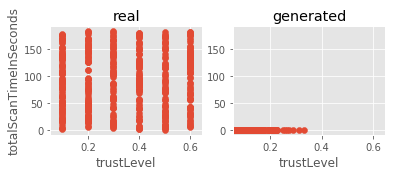

Step: 100 of 501.
Losses: G, D Gen, D Real, Xgb: 5.4591, 0.0101, 0.1761, 1.0000
D Real - D Gen: 0.1660


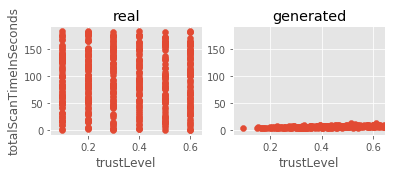

Step: 200 of 501.
Losses: G, D Gen, D Real, Xgb: 7.8701, 6.1925, 1.0097, 1.0000
D Real - D Gen: -5.1828


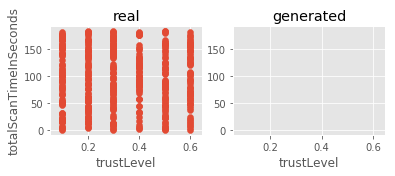

Step: 300 of 501.
Losses: G, D Gen, D Real, Xgb: 4.9670, 0.3293, 0.1445, 1.0000
D Real - D Gen: -0.1848


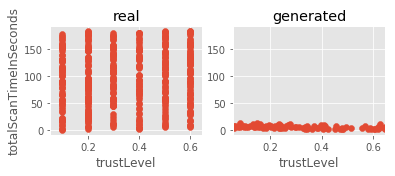

Step: 400 of 501.
Losses: G, D Gen, D Real, Xgb: 0.5950, 2.3614, 2.4013, 0.9980
D Real - D Gen: 0.0399


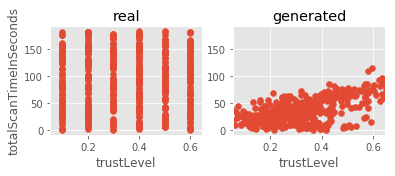

Step: 500 of 501.
Losses: G, D Gen, D Real, Xgb: 1.5726, 0.8933, 1.3582, 0.9939
D Real - D Gen: 0.4649


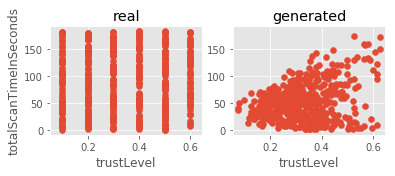

data_dim:  20
data_cols:  ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'scannedLineItems', 'pricePerScannedLineItem', 'scansWithoutRegistrationPerScannedLineItem', 'quantityModificationsPerScannedLineItem', 'lineItemVoidsPerSecond', 'scansWithoutRegistrationPerSecond', 'quantityModificationsPerSecond', 'secondsPerEuro', 'lineItemVoidsPerEuro', 'scansWithoutRegistrationPerEuro', 'quantityModificationsPerEuro']
label_dim:  1
label_cols:  ['fraud']
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, 20)           0                                            
__________________________________________________________________________________________________

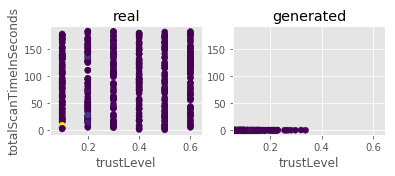

Step: 100 of 501.
Losses: G, D Gen, D Real, Xgb: 2.3695, 0.3100, 0.1517, 1.0000
D Real - D Gen: -0.1583


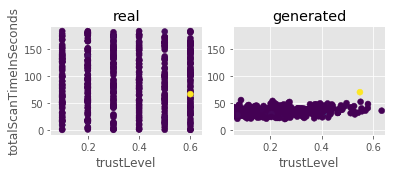

Step: 200 of 501.
Losses: G, D Gen, D Real, Xgb: 1.4301, 0.6722, 0.7342, 1.0000
D Real - D Gen: 0.0620


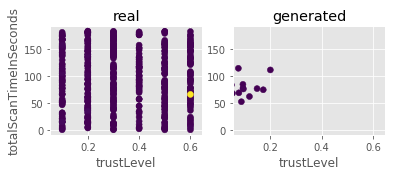

Step: 300 of 501.
Losses: G, D Gen, D Real, Xgb: 0.9049, 0.7982, 0.7536, 1.0000
D Real - D Gen: -0.0445


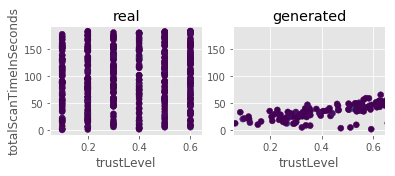

Step: 400 of 501.
Losses: G, D Gen, D Real, Xgb: 0.9500, 0.6439, 0.7975, 0.9959
D Real - D Gen: 0.1537


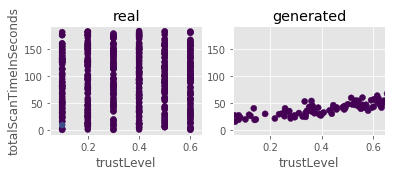

Step: 500 of 501.
Losses: G, D Gen, D Real, Xgb: 0.8809, 0.6611, 0.6770, 0.9980
D Real - D Gen: 0.0160


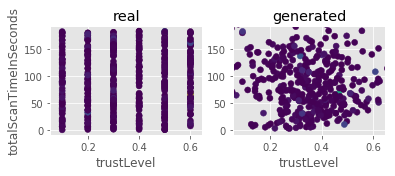

CPU times: user 59.7 s, sys: 9.11 s, total: 1min 8s
Wall time: 27.4 s


In [52]:
%%time

# Training the vanilla GAN and CGAN architectures

k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN
adversarial_training_GAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # CGAN

In [51]:
train

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,...,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
0,0.5,105.4,5.470,0.7,0.0,0.3,0.002751,0.005190,0.024138,0,...,0.188621,0.000000,0.010345,0.000664,0.000000,0.000285,1.926874,0.012797,0.000000,0.005484
1,0.3,10.8,2.736,0.5,0.2,0.4,0.012963,0.025333,0.035714,0,...,0.195429,0.014286,0.028571,0.004630,0.001852,0.003704,0.394737,0.018275,0.007310,0.014620
2,0.3,151.6,6.216,0.3,1.0,0.5,0.000858,0.004100,0.023077,0,...,0.478154,0.076923,0.038462,0.000198,0.000660,0.000330,2.438867,0.004826,0.016088,0.008044
3,0.6,179.1,9.231,0.8,0.4,0.4,0.001619,0.005154,0.027586,0,...,0.318310,0.013793,0.013793,0.000447,0.000223,0.000223,1.940201,0.008666,0.004333,0.004333
4,0.5,43.0,8.153,0.3,0.7,0.2,0.006279,0.018960,0.011111,0,...,0.301963,0.025926,0.007407,0.000698,0.001628,0.000465,0.527413,0.003680,0.008586,0.002453
5,0.1,77.0,1.109,1.1,0.5,0.2,0.003377,0.001440,0.042308,1,...,0.042654,0.019231,0.007692,0.001429,0.000649,0.000260,6.943192,0.099188,0.045086,0.018034
6,0.3,29.4,5.563,0.2,0.7,0.1,0.003741,0.018922,0.018182,0,...,0.505727,0.063636,0.009091,0.000680,0.002381,0.000340,0.528492,0.003595,0.012583,0.001798
7,0.2,154.5,2.280,0.0,0.8,0.4,0.000647,0.001476,0.000000,0,...,0.228000,0.080000,0.040000,0.000000,0.000518,0.000259,6.776316,0.000000,0.035088,0.017544
8,0.6,96.2,6.544,0.7,0.0,0.2,0.002807,0.006802,0.025926,0,...,0.242370,0.000000,0.007407,0.000728,0.000000,0.000208,1.470049,0.010697,0.000000,0.003056
9,0.2,72.5,4.108,1.0,0.2,0.4,0.003724,0.005666,0.037037,0,...,0.152148,0.007407,0.014815,0.001379,0.000276,0.000552,1.764849,0.024343,0.004869,0.009737


In [41]:
seed = 17
np.random.seed(seed)

data_dim = len(data_cols)
label_dim = len(label_cols)

base_dir = 'cache lr mix base 128 act mix 171026/'
rand_dim = data_dim 
base_n_count = 128

In [53]:
# Let's look at some of the generated data
# First create the networks locally and load the weights

import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

seed = 17

train = train_pure.copy().reset_index(drop=True) # fraud only with labels from classification

# train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
label_cols = [ i for i in train.columns if 'fraud' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train[ data_cols ] = train[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train[ data_cols ]

data_dim = len(data_cols)
label_dim = len(label_cols)
with_class = False
if label_dim > 0: with_class = True
np.random.seed(seed)

# define network models

# generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count, type='Wasserstein')
# generator_model.load_weights('cache/WCGAN_generator_model_weights_step_4800.h5')
generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count)
generator_model.load_weights('cache/CGAN_generator_model_weights_step_500.h5')


# with_class = False
# train = train_no_label
# label_cols = []
# # generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count, type='Wasserstein')
# # generator_model.load_weights('cache/WGAN_generator_model_weights_step_4800.h5')

# generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count)
# generator_model.load_weights('cache/GAN_generator_model_weights_step_5000.h5')

In [54]:
# Now generate some new data

test_size = 492 # Equal to all of the fraud cases

x = train_pure
z = np.random.normal(size=(test_size, rand_dim))
labels = x.iloc[:,-label_dim]
g_z = generator_model.predict([z, labels])
g_z[1]

array([ 2.1939863e-01,  1.3028374e+02,  6.4245129e+00,  2.1292705e-02,
       -5.2675587e-01,  1.1579777e+00, -5.4270238e-01,  1.4144005e-01,
        3.6364439e-01, -1.0705144e+00,  4.6299154e-01, -1.1068376e+00,
       -6.6248214e-01,  4.3032017e-01,  6.9828883e-02,  6.2577301e-01,
       -4.6958023e-01,  2.4789248e+00, -1.5379877e+00, -4.4556591e-01,
        1.4619882e-01], dtype=float32)

In [55]:
z.shape

(492, 20)

In [93]:
y_gan=np.ones(492)
x.shape
g_z.shape

type(train)
ind= train.columns
g_z.shape

(492, 21)

In [95]:
concat =np.concatenate((train,g_z)) 
train = pd.DataFrame(data=concat,columns=ind)
print(train.columns)
x, y =   smoteOverSamling(train,1,0.3)
x_val, y_val = x_holdout, y_holdout


RangeIndex(start=0, stop=21, step=1)


KeyError: "['fraud'] not found in axis"

In [17]:

# Logistic Regression
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=x.shape[1]))
model.compile(optimizer='rmsprop', loss='binary_crossentropy')
model.fit(x, y, nb_epoch=10, validation_data=(x_val, y_val))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 2307 samples, validate on 376 samples
Epoch 1/10
2307/2307 [==============================] - 0s 189us/step - loss: 10.9667 - val_loss: 14.5700
Epoch 2/10
2307/2307 [==============================] - 0s 24us/step - loss: 10.6527 - val_loss: 14.3743
Epoch 3/10
2307/2307 [==============================] - 0s 24us/step - loss: 10.1839 - val_loss: 13.9354
Epoch 4/10
2307/2307 [==============================] - 0s 24us/step - loss: 9.4602 - val_loss: 13.2719
Epoch 5/10
2307/2307 [==============================] - 0s 23us/step - loss: 8.1058 - val_loss: 12.1313
Epoch 6/10
2307/2307 [==============================] - 0s 23us/step - loss: 4.7874 - val_loss: 8.8338
Epoch 7/10
2307/2307 [==============================] - 0s 24us/step - loss: 1.1504 - val_loss: 2.5937
Epoch 8/10
2307/2307 [==============================] - 0s 26us/step - loss: 0.7003 - val_loss: 2.4864
Epoch 9/10
2307/2307 [==============================] - 0s 26us/step - loss: 0.6652 - val_loss: 2.3442
Epoch 10/10
2307/

In [18]:
y_pred = model.predict(x_holdout).astype(int)
my_custom_loss_func(y_holdout,y_pred)


[[348   3]
 [ 25   0]]


-0.5319148936170213

In [19]:
from keras.regularizers import l1_l2
reg = l1_l2(l1=0.01, l2=0.01)

model = Sequential()
model.add(Dense(1, activation='sigmoid', W_regularizer=reg, input_dim=x.shape[1]))
model.compile(optimizer='rmsprop', loss='binary_crossentropy')
model.fit(x, y, nb_epoch=100,  batch_size=1000,validation_data=(x_val, y_val))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=20, kernel_regularizer=<keras.reg...)`
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 2307 samples, validate on 376 samples
Epoch 1/100
2307/2307 [==============================] - 0s 173us/step - loss: 1.1772 - val_loss: 1.1547
Epoch 2/100
2307/2307 [==============================] - 0s 4us/step - loss: 1.0288 - val_loss: 1.1663
Epoch 3/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.9601 - val_loss: 1.2200
Epoch 4/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.9246 - val_loss: 1.3118
Epoch 5/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.9079 - val_loss: 1.4092
Epoch 6/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.8999 - val_loss: 1.5457
Epoch 7/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.8953 - val_loss: 1.6306
Epoch 8/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.8920 - val_loss: 1.5452
Epoch 9/100
2307/2307 [==============================] - 0s 2us/step - loss: 0.8889 - val_loss: 1.6602
Epoch 10/100
2307/2307 [

In [20]:
y_pred = model.predict(x_holdout).astype(int)
my_custom_loss_func(y_holdout,y_pred)

[[351   0]
 [ 25   0]]


-0.3324468085106383

In [21]:
from keras.layers import Dense, Dropout,Activation,BatchNormalization




hidden_par=7
input_dim= x.shape[1]

model = Sequential()
model.add(Dense(hidden_par, input_dim=input_dim, init='uniform',
                W_regularizer=reg,
                bias_regularizer=reg
               ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid', input_dim=(hidden_par,),
               W_regularizer=reg,
                bias_regularizer=reg))
model.compile(optimizer='rmsprop', loss='binary_crossentropy')

model.fit(x, y, nb_epoch=100,batch_size=1000, validation_data=(x_val, y_val))

model.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=20, bias_regularizer=<keras.reg..., kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=(7,), bias_regularizer=<keras.reg..., kernel_regularizer=<keras.reg...)`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 2307 samples, validate on 376 samples
Epoch 1/100
2307/2307 [==============================] - 1s 289us/step - loss: 0.7331 - val_loss: 0.4752
Epoch 2/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.6639 - val_loss: 0.4270
Epoch 3/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.6581 - val_loss: 0.4607
Epoch 4/100
2307/2307 [==============================] - 0s 2us/step - loss: 0.6458 - val_loss: 0.5015
Epoch 5/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.6370 - val_loss: 0.5461
Epoch 6/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.6340 - val_loss: 0.5881
Epoch 7/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.6372 - val_loss: 0.6178
Epoch 8/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.6393 - val_loss: 0.6380
Epoch 9/100
2307/2307 [==============================] - 0s 3us/step - loss: 0.6401 - val_loss: 0.6588
Epoch 10/100
2307/2307 [

In [22]:
y_pred = model.predict(x_holdout).astype(int)
my_custom_loss_func(y_holdout,y_pred)

[[351   0]
 [ 25   0]]


-0.3324468085106383